# SPX - Equal Weighted Monthly Rebalance

Andreas Clenow denounces using the SPX index as a benchmark- claiming that it is not an objective measurement of the financial markets and is in fact just another trading model.  His basis for this is that in constructing any index it is neccessary for it to be geared towards a factor and that most modern market indexes are based on two factors (momentum and market cap).


Both are fairly obvious for the SPX index:

- companies with a market cap of greater than $5B would have required strong price performance in the past.  This is akin to a momentum strategy.

- the index is weighted by market cap which is claimed to have an unintended side effect of destroying diversification.  Clenow claims that it is strongly weighted towards the larger stocks which is easily verifiable by looking at the makeup of the constituents.  Currently the top 3 (MSFT, AAPL & AMZN) account for over 10% of the weightings whilst the top 10 makes up 21.50%!  We can easily observe this is not quite the diversified portfolio one would expect.

Below I will look at a strategy that rebalances each month to equal-weight each member of the index.  Currently this does not include commission costs or dividends.

In [8]:
""" imports and setup """

%matplotlib inline

import zipline
from zipline.api import order_target_percent, symbol, schedule_function, date_rules, time_rules

from datetime import datetime
import pytz
import pandas as pd
import numpy as np
import pyfolio as pf

path_to_data = 'K:/Share/Personal/Ryan/CFA/TradingBook/ProjectOne/'

In [3]:
""" zipline function calls """

def initialize(context):
    context.index_members = pd.read_csv(path_to_data + 'index-member-data.csv', index_col=0, parse_dates=[0])

    schedule_function(
        func=rebalance,
        date_rule=date_rules.month_start(),
        time_rule=time_rules.market_open())

def rebalance(context, data):

    # date
    today = zipline.api.get_datetime().normalize()

    # index makeup for date
    index_constituents = context.index_members.loc[context.index_members.index == today]
    todays_universe = [symbol(ticker) for ticker in index_constituents.loc[:]['BBGID']]

    # trade logic
    buys = todays_universe

    # sells
    for security in context.portfolio.positions:
        if (security not in buys):
            order_target_percent(security, 0.0)

    position_size = 1.0 / len(buys)

    # buys
    for security in buys:
        order_target_percent(security, position_size)

In [4]:
""" Set dates and run backtest """

start = datetime(1998, 1, 1, tzinfo=pytz.UTC)
end = datetime(2018, 12, 31, tzinfo=pytz.UTC)

# run backtests
result = zipline.run_algorithm(
    start=start, end=end,
    initialize=initialize,
    capital_base=100000000,
    data_frequency='daily',
    bundle='random_stock_data')

Start date,1998-01-02
End date,2018-12-31
Total months,251
,Backtest
Annual return,7.9%
Cumulative returns,394.5%
Annual volatility,20.3%
Sharpe ratio,0.48
Calmar ratio,0.13
Stability,0.90
Max drawdown,-60.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,60.43,2007-07-13,2009-03-09,2011-02-11,936
1,38.83,2001-05-21,2002-10-09,2003-10-13,626
2,23.01,2011-05-10,2011-10-03,2012-03-13,221
3,21.59,1998-04-22,1998-10-08,1999-01-06,186
4,20.74,2018-09-21,2018-12-24,NaT,NaN


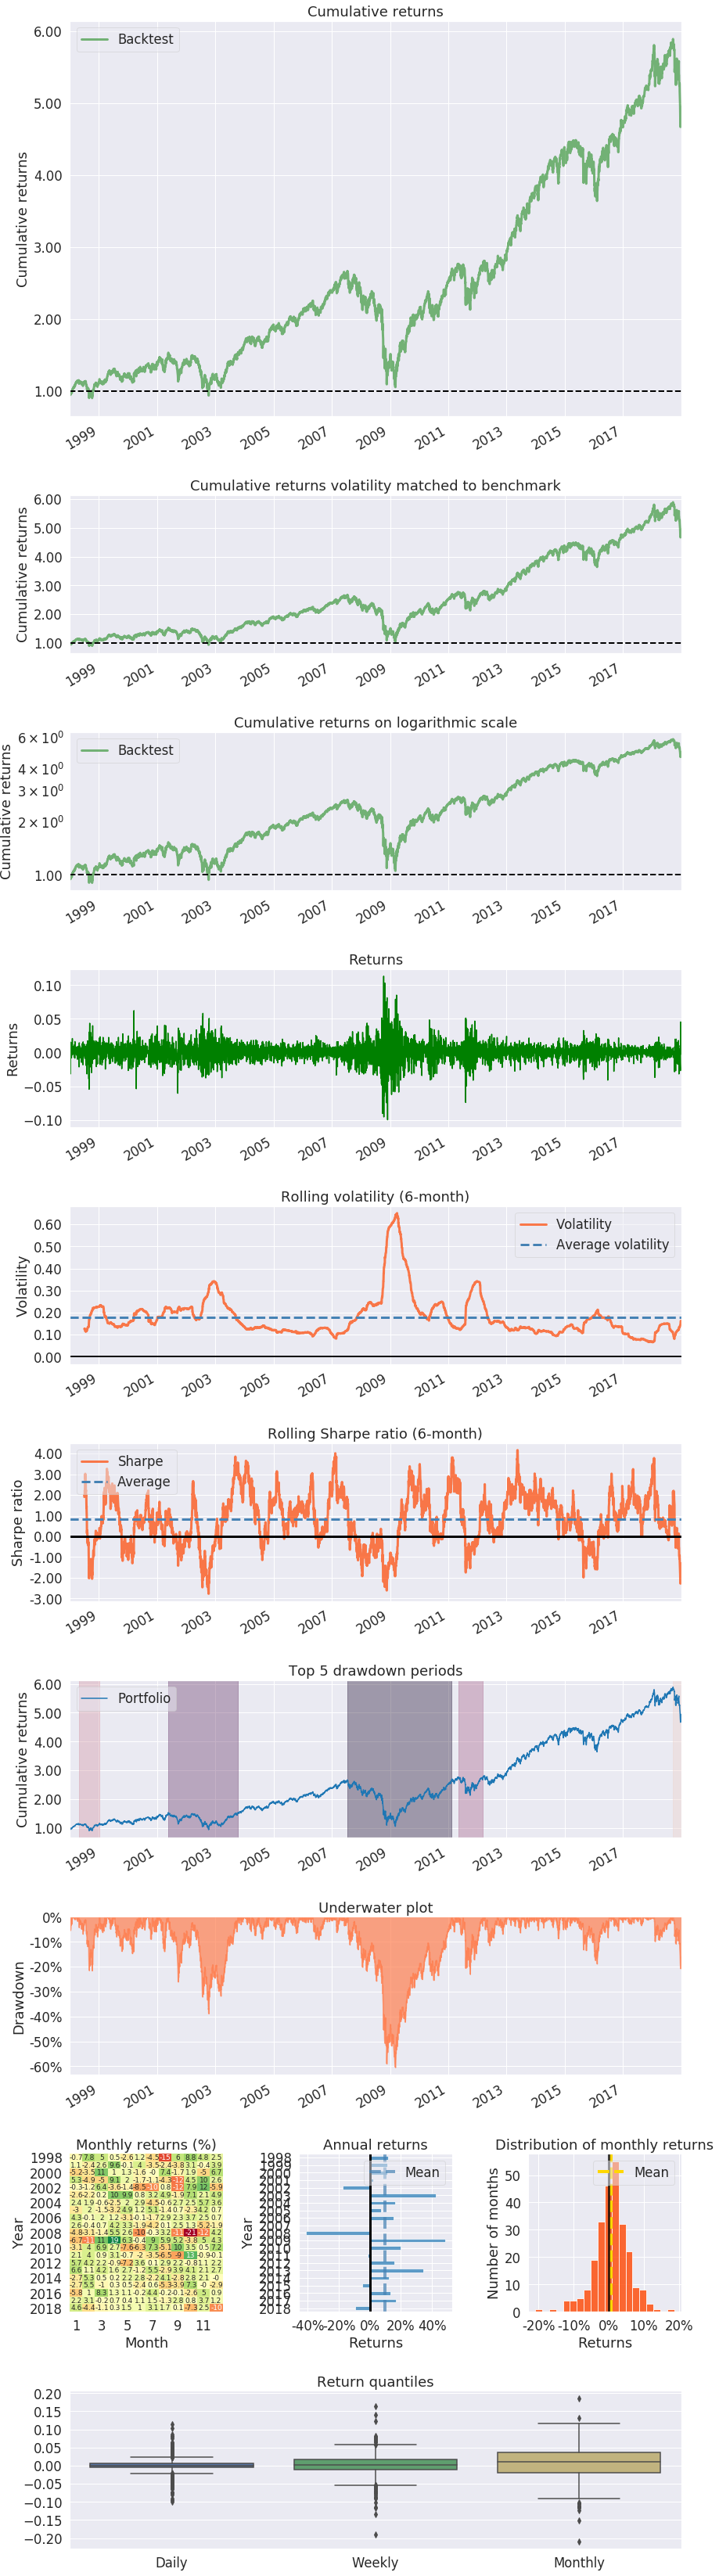

In [9]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(result)
pf.create_returns_tear_sheet(returns)

Obviously it is not recommended to actually trade this system (not many can withstand a 60% drawdown) but it does represent a signifcant outperformance over the index itself.

Of course once trading costs for monthly rebalancing ~500 stocks would also be exorbitant.  This leads us to the next analysis- randomly selected a number of stocks from the index.


## SPX index performance over the same period:

Start date: 1998-01-02
End date: 2018-12-31

Annual return: 4.62%
Cumulative returns: 158.32%